<a href="https://colab.research.google.com/github/pterdactyl/Simple-CNN-Model/blob/main/Image_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [25]:
# Download data set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
print(X_train.shape)
print(X_train.dtype)
print(y_test.shape)
print(y_test.dtype)

(50000, 32, 32, 3)
uint8
(10000, 1)
uint8


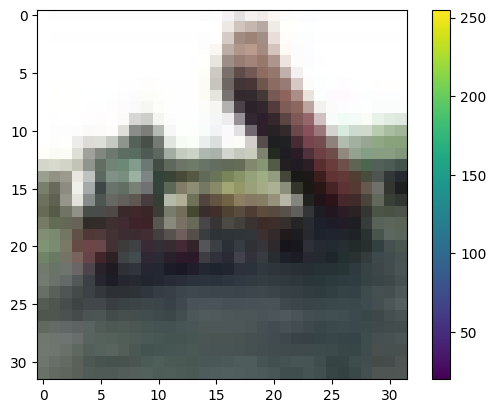

In [27]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0
y_test = y_test

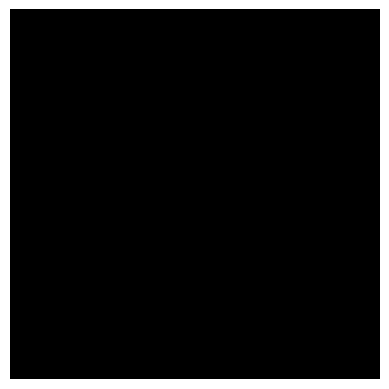

In [36]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
class_names[y_test[0][0]]

'cat'

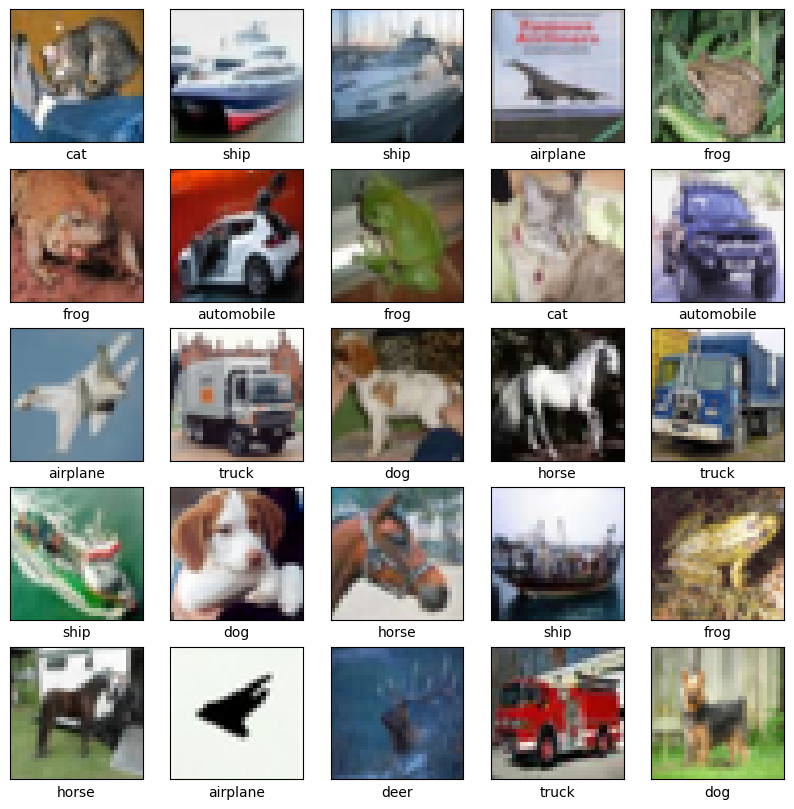

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i], cmap='binary')
  plt.xlabel(class_names[y_test[i][0]])
plt.show()

In [14]:
model = keras.Sequential([
keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=[32, 32, 3]),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(32, (3, 3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Flatten(),
keras.layers.Dense(256, activation="relu"),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 39s 27ms/step - loss: 1.9846 - accuracy: 0.2804 - val_loss: 1.7155 - val_accuracy: 0.3794
Epoch 2/20
1407/1407 [==============================] - 32s 23ms/step - loss: 1.6059 - accuracy: 0.4262 - val_loss: 1.5011 - val_accuracy: 0.4542
Epoch 3/20
1407/1407 [==============================] - 35s 25ms/step - loss: 1.4365 - accuracy: 0.4875 - val_loss: 1.4104 - val_accuracy: 0.4888
Epoch 4/20
1407/1407 [==============================] - 32s 23ms/step - loss: 1.3272 - accuracy: 0.5276 - val_loss: 1.2647 - val_accuracy: 0.5544
Epoch 5/20
1407/1407 [==============================] - 32s 23ms/step - loss: 1.2350 - accuracy: 0.5624 - val_loss: 1.3718 - val_accuracy: 0.5240
Epoch 6/20
1407/1407 [==============================] - 36s 25ms/step - loss: 1.1585 - accuracy: 0.5944 - val_loss: 1.2285 - val_accuracy: 0.5676
Epoch 7/20
1407/1407 [==============================] - 32s 23ms/step - loss: 1.0892 - accuracy: 0.6181 - val_loss: 1.1473 -

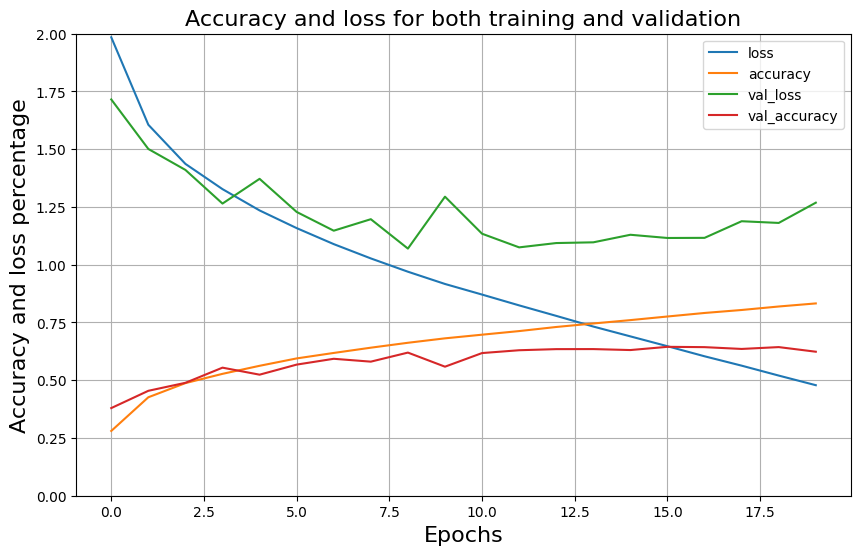

In [17]:
history_dict = history.history
history_dict.keys()
pd.DataFrame(history_dict).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Accuracy and loss for both training and validation', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy and loss percentage', rotation=90, fontsize=16)
plt.show()